In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [42]:
copm = pd.read_csv("50_Startups.csv")

In [43]:
copm.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [44]:
copm.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [45]:
# Correlation Matrix
copm.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


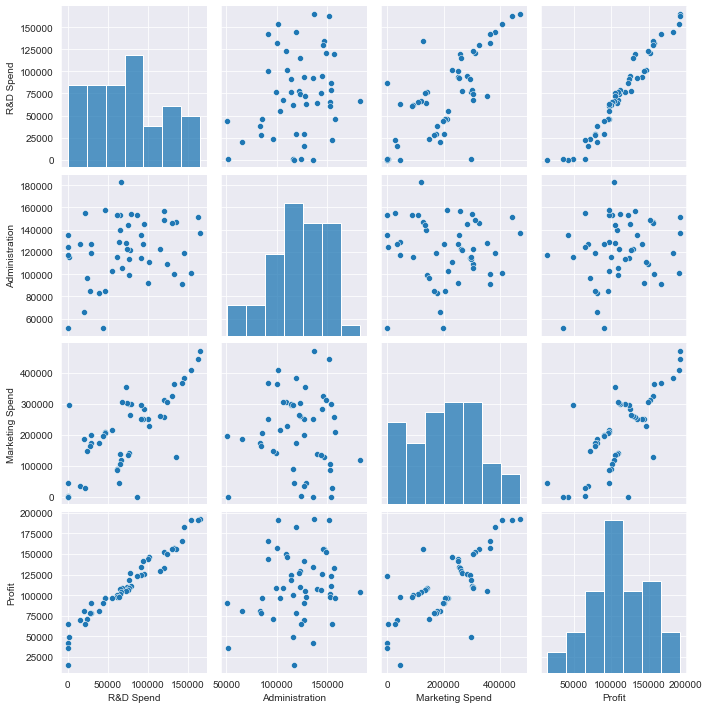

In [46]:
sns.set_style(style="darkgrid")
sns.pairplot(copm)

In [47]:
import pandas as pd
copm.rename(columns = {'R&D Spend' : 'RD', 'Marketing Spend' : 'Marketing'}, inplace = True)

In [48]:
copm.head()

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [50]:
#Build Model
import statsmodels.formula.api as smf
model = smf.ols('Profit~RD+Administration+Marketing',data=copm).fit()

In [51]:
model.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           4.53e-30
Time:                        14:59:16   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
print(model.tvalues,'\n', model.pvalues)

Intercept          7.626218
RD                17.846374
Administration    -0.525507
Marketing          1.655077
dtype: float64 
 Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64


In [57]:
model_1=smf.ols('Profit~RD',data=copm).fit()
model_1.params

Intercept    49032.899141
RD               0.854291
dtype: float64

In [59]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           3.50e-32
Time:                        15:08:48   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
model_2=smf.ols('Profit~Administration',data=copm).fit()
model_2.params

Intercept         76974.471305
Administration        0.288749
dtype: float64

In [67]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 06 Jun 2021   Prob (F-statistic):              0.162
Time:                        15:11:39   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
model_3=smf.ols('Profit~Marketing',data=copm).fit()
model_3.params

Intercept    60003.548816
Marketing        0.246459
dtype: float64

In [72]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           4.38e-10
Time:                        15:14:25   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
model_4=smf.ols('Profit~RD+Marketing',data=copm).fit()
model_4.params

Intercept    46975.864221
RD               0.796584
Marketing        0.029908
dtype: float64

In [74]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           2.16e-31
Time:                        15:14:33   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD             0.7966      0.041     19.266      0.000       0.713       0.880
Marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

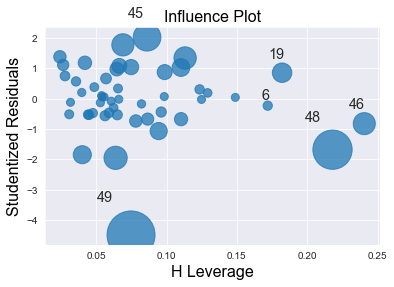

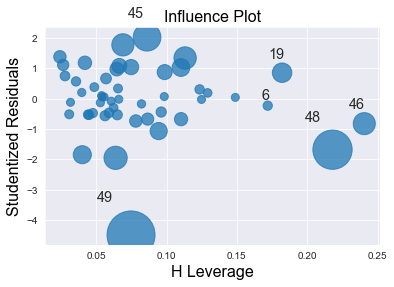

In [75]:
import statsmodels.api as sm
sm.graphics.influence_plot(model)

In [77]:
startup_new=copm.drop(copm.index[[46,48,49,19]],axis=0)

In [79]:
startup_new.head()

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [100]:
rsq_RD = smf.ols('RD~Administration+Marketing+Profit',data=startup_new).fit().rsquared  
vif_RD = 1/(1-rsq_RD) # 16.33

rsq_Administration = smf.ols('Administration~RD+Marketing+Profit',data=startup_new).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) # 564.98

rsq_Marketing = smf.ols('Marketing~Administration+Profit+RD',data=startup_new).fit().rsquared  
vif_Marketing = 1/(1-rsq_Marketing) #  564.84

rsq_Profit = smf.ols('Profit~Administration+Marketing+RD',data=startup_new).fit().rsquared  
vif_Profit = 1/(1-rsq_Profit) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['RD','Administration','Marketing','Profit'],'VIF':[vif_RD,vif_Administration,vif_Marketing,vif_Profit]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,24.744942
1,Administration,1.237256
2,Marketing,3.269436
3,Profit,26.555609


In [102]:
model_f = smf.ols('Profit~RD+Administration+Marketing',data=startup_new).fit()
model_f.params

Intercept         57647.195196
RD                    0.749272
Administration       -0.052558
Marketing             0.031968
dtype: float64

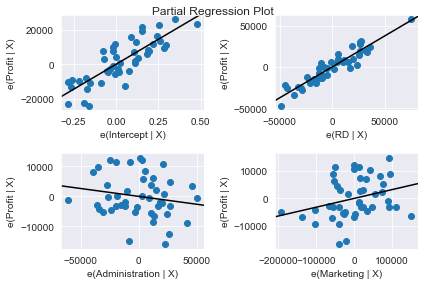

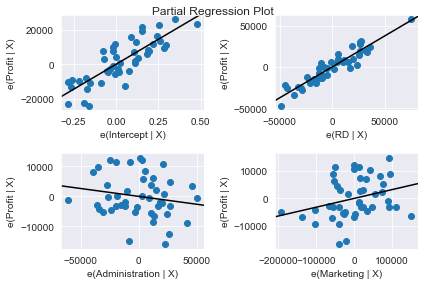

In [105]:
sm.graphics.plot_partregress_grid(model_f)

In [106]:
final_ml= smf.ols('Profit~RD+Marketing+Administration',data=startup_new).fit()
final_ml.params
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     357.8
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           6.40e-30
Time:                        15:57:16   Log-Likelihood:                -472.28
No. Observations:                  46   AIC:                             952.6
Df Residuals:                      42   BIC:                             959.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.765e+04   5928.026      9.725      0.000    4.57e+04    6.96e+04
RD                 0.7493      0.043     17.294      0.000       0.662       0.837
Marketing          0.0320      0.016      1.971      0.055      -0.001       0.065
Administration    -0.0526      0.044     -1.189      0.241      -0.142       0.037
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.547
Skew:                           0.063   Prob(JB):                        0.761
Kurtosis:                       2.481   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
startup_new_pred = final_ml.predict(startup_new)

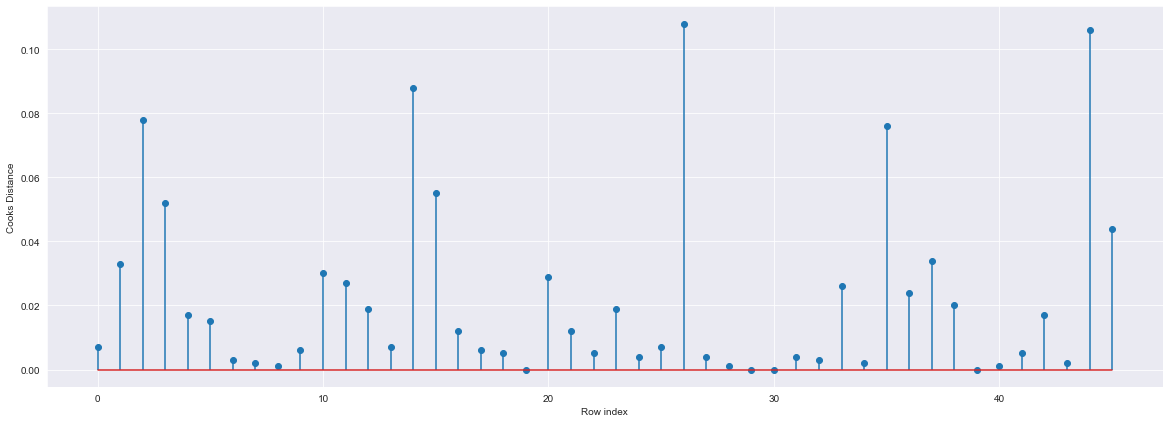

In [160]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup_new)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [161]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(26, 0.10753420361757617)

In [162]:
#Drop 26 observations
startup_new_1=startup_new.drop(startup_new.index[[26]],axis=0)

In [163]:
startup_new_1.reset_index()
startup_new_1.head()

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [164]:
final_ml_1= smf.ols('Profit~RD+Marketing+Administration',data=startup_new_1).fit()


In [170]:
model_influence_V = final_ml_1.get_influence()
(c_V, _) = model_influence_V.cooks_distance

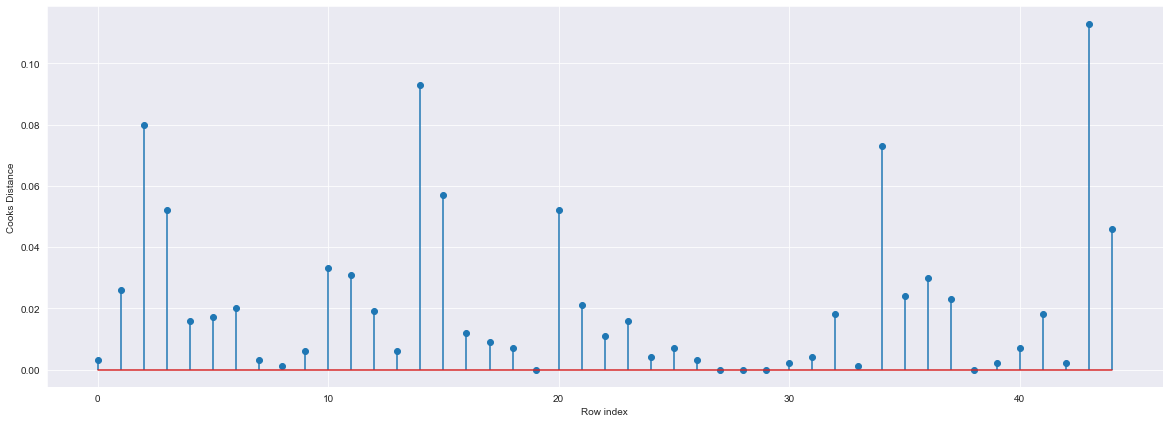

In [172]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup_new_1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [173]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(43, 0.11287333546766842)

In [179]:
    #Check the accuracy of the mode
final_ml_1= smf.ols('Profit~RD+Marketing+Administration',data=startup_new_2).fit()

In [183]:
(final_ml_1.rsquared,final_ml_1.aic)

(0.9630635596235643, 910.3736217059336)

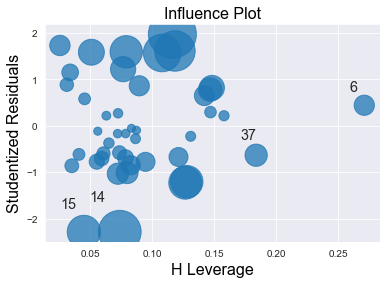

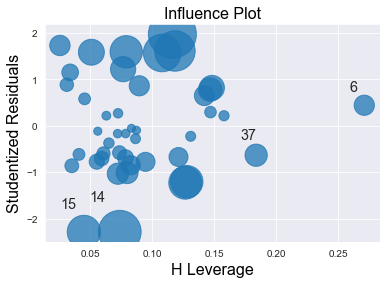

In [184]:
import statsmodels.api as sm
sm.graphics.influence_plot(final_ml_1)

In [185]:
startup_new_3=copm.drop(copm.index[[37,14,15,6]],axis=0)

In [188]:
final_ml_2= smf.ols('Profit~RD+Marketing+Administration',data=startup_new_3).fit()

In [190]:
(final_ml_2.rsquared,final_ml_1.aic)

(0.9569206727427748, 970.4622888057779)

In [193]:
#New data for prediction
new_data=pd.DataFrame({'RD':40,"Marketing":95,"Administration":102},index=[1])

In [194]:
final_ml_2.predict(new_data)

1    48714.731491
dtype: float64

In [196]:
final_ml_2.predict(startup_new.iloc[0:5,])

0    194639.047997
1    191526.572640
2    183890.165851
3    175524.271705
4    173690.346133
dtype: float64